In [1]:
# Import packages and set configuration
# from IPython.display import display

%load_ext autoreload
%autoreload 2

In [2]:
tickers = ["BTCUSDT", "ETHUSDT", "BNBUSDT", "SOLUSDT", "XRPUSDT", "ADAUSDT", "AVAXUSDT", "DOGEUSDT", "TRXUSDT",
           "DOTUSDT", "LINKUSDT", "SHIBUSDT", "LTCUSDT", "BCHUSDT", "UNIUSDT"]
interval = "1h"

fee_rate = 0.0005  # 0.05%
initial_cash = 100000
position_size = 1  # each of 5 pairs has 20% of portfolio capital

beta_hedge = True
is_spread = False

In [3]:
pair_selection_start = "2024-01-01"
pair_selection_end = "2024-03-01"

In [4]:
# Load data
from modules.data_services.data_loaders import load_data

df = load_data(
    tickers=tickers,
    start=pair_selection_start,
    end=pair_selection_end,
    interval=interval
)

In [5]:
# Pair Selection (select a TOP5 pairs)
from modules.pair_selection.statistical_tests import engle_granger_cointegration

eg_df = engle_granger_cointegration(df)
tickers = eg_df.iloc[0:5, 0].tolist()
eg_df.head(5)

,pair,eg_p_value,adf_stat
0,ETHUSDT-BCHUSDT,0.002988,-4.256718
1,BTCUSDT-BCHUSDT,0.004171,-4.161398
2,BNBUSDT-UNIUSDT,0.007593,-3.982967
3,BTCUSDT-ADAUSDT,0.013955,-3.790522
4,BTCUSDT-SOLUSDT,0.015325,-3.759751


#### 1.2 Parameter optimization

In [6]:
pre_training_start = "2024-01-01"
training_start = "2024-02-01"
training_end = "2024-03-01"

pre_test_start = "2024-02-01"
test_start = "2024-03-01"
test_end = "2024-04-01"

Pair: ETHUSDT/BCHUSDT
                     ETHUSDT  BCHUSDT  z_score    beta  entry_thr  exit_thr  \
open_time                                                                     
2024-03-01 00:00:00  3378.73    304.2  -0.7563  0.5869     1.9266    0.7276   
2024-03-01 01:00:00  3375.20    306.1  -0.7440  0.5725     1.9266    0.7276   
2024-03-01 02:00:00  3366.73    313.5  -0.8455  0.4405     1.9266    0.7276   
2024-03-01 03:00:00  3367.79    317.5  -0.7558  0.4224     1.9266    0.7276   
2024-03-01 04:00:00  3376.87    315.1  -0.4882  0.4402     1.9266    0.7276   
...                      ...      ...      ...     ...        ...       ...   
2024-03-31 20:00:00  3633.25    680.5   0.8537  0.0085     1.9266    0.7276   
2024-03-31 21:00:00  3625.32    678.8   0.4833  0.0138     1.9266    0.7276   
2024-03-31 22:00:00  3629.80    680.8   0.8062  0.0185     1.9266    0.7276   
2024-03-31 23:00:00  3645.29    678.7   1.9828  0.0190     1.9266    0.7276   
2024-04-01 00:00:00  3625.41  

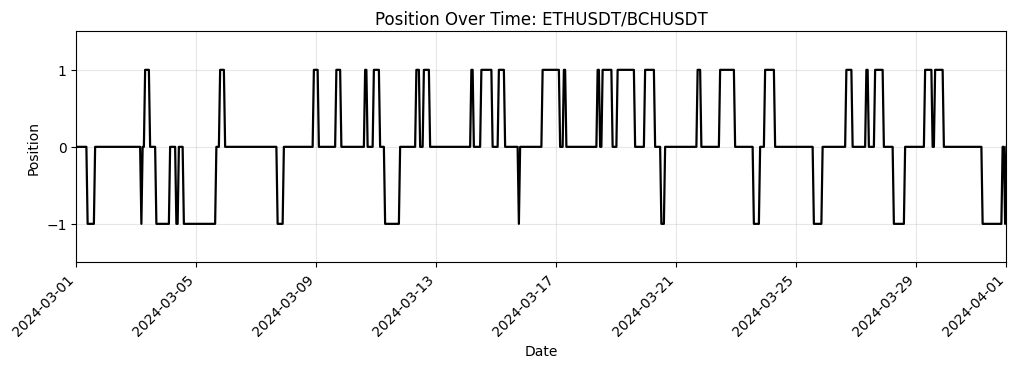

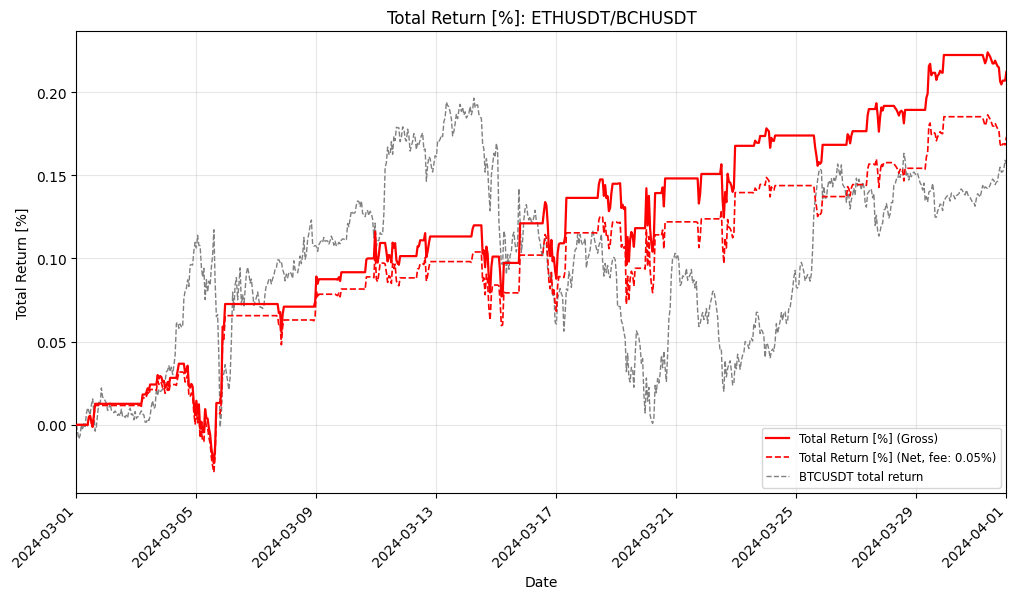

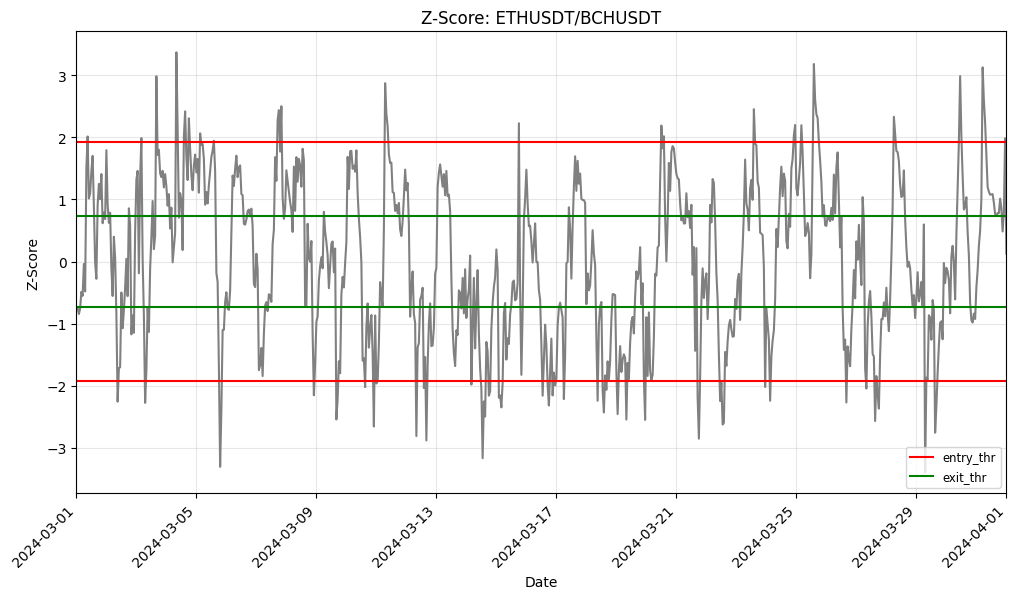

Pair: BTCUSDT/BCHUSDT
                      BTCUSDT  BCHUSDT  z_score    beta  entry_thr  exit_thr  \
open_time                                                                      
2024-03-01 00:00:00  61501.11    304.2  -0.7207  0.4044     1.9266    0.7276   
2024-03-01 01:00:00  61214.35    306.1  -0.9683  0.3799     1.9266    0.7276   
2024-03-01 02:00:00  60980.00    313.5  -1.1244  0.2813     1.9266    0.7276   
2024-03-01 03:00:00  61105.91    317.5  -0.8596  0.2819     1.9266    0.7276   
2024-03-01 04:00:00  61524.09    315.1  -0.2370  0.2692     1.9266    0.7276   
...                       ...      ...      ...     ...        ...       ...   
2024-03-31 20:00:00  70840.00    680.5   1.5166  0.0109     1.9266    0.7276   
2024-03-31 21:00:00  70856.00    678.8   1.4019  0.0129     1.9266    0.7276   
2024-03-31 22:00:00  70970.00    680.8   1.5817  0.0130     1.9266    0.7276   
2024-03-31 23:00:00  71280.01    678.7   2.1710  0.0022     1.9266    0.7276   
2024-04-01 00:00:0

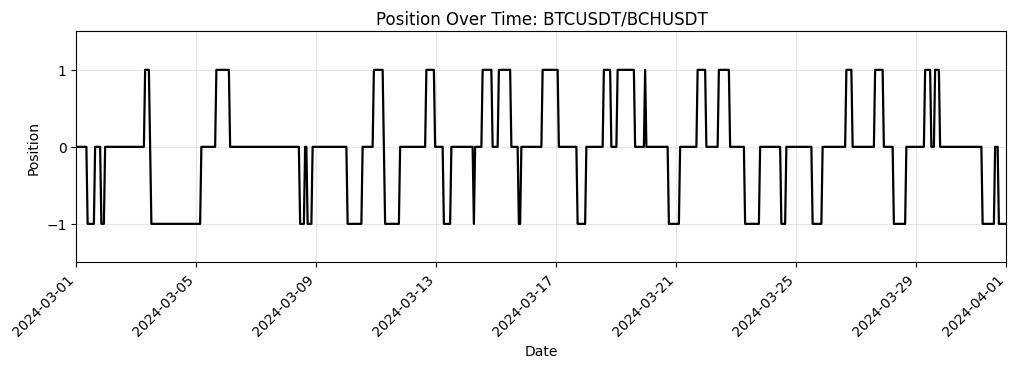

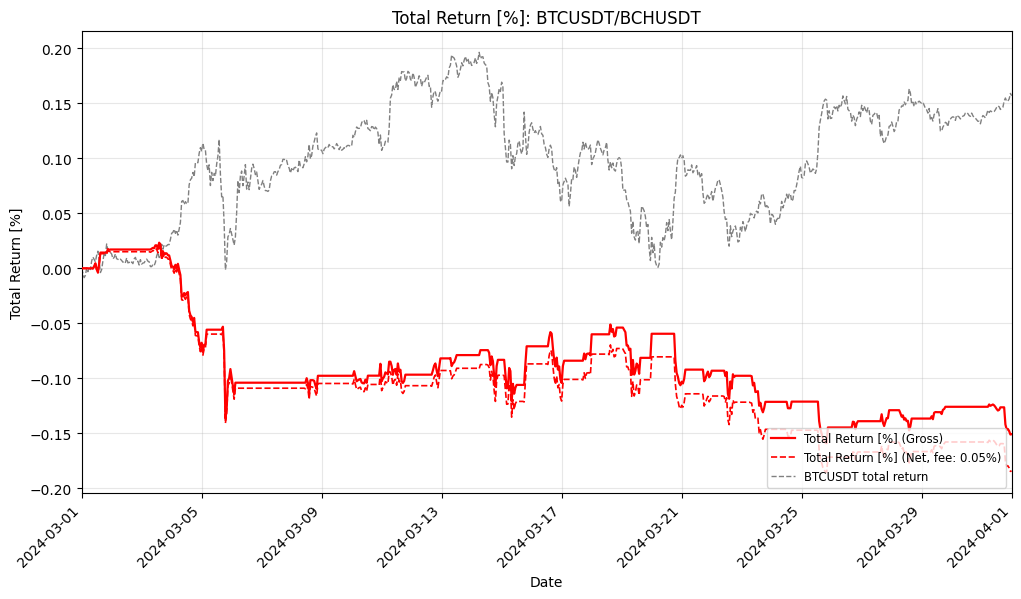

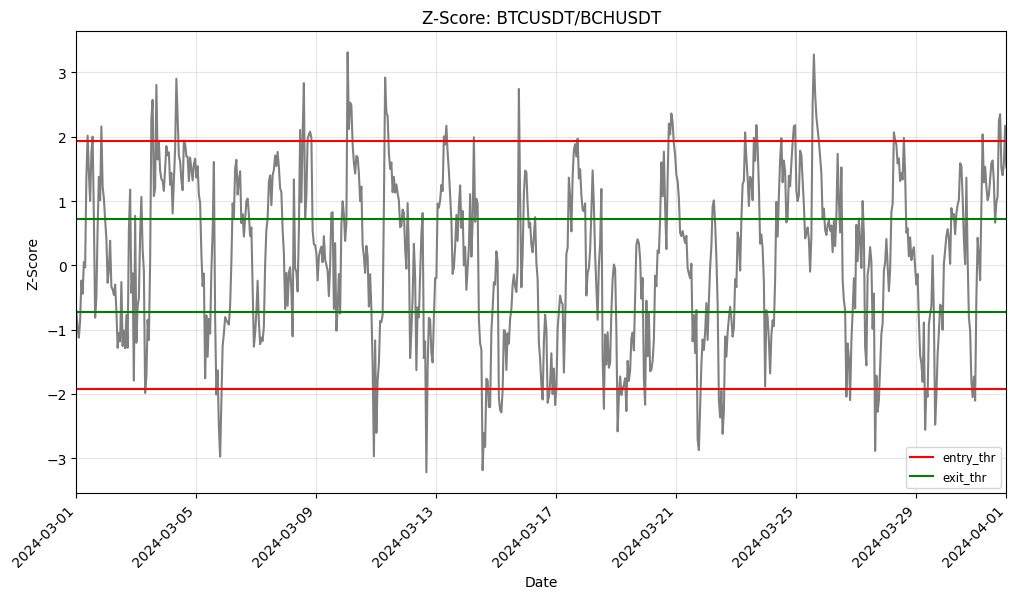

Pair: BNBUSDT/UNIUSDT
                     BNBUSDT  UNIUSDT  z_score    beta  entry_thr  exit_thr  \
open_time                                                                     
2024-03-01 00:00:00    404.3   11.212  -0.4943  0.2156     1.9266    0.7276   
2024-03-01 01:00:00    405.3   11.221  -0.1734  0.2119     1.9266    0.7276   
2024-03-01 02:00:00    405.4   11.060  -0.0695  0.1991     1.9266    0.7276   
2024-03-01 03:00:00    405.6   11.051   0.0931  0.1924     1.9266    0.7276   
2024-03-01 04:00:00    406.9   11.015   0.5559  0.1857     1.9266    0.7276   
...                      ...      ...      ...     ...        ...       ...   
2024-03-31 20:00:00    606.9   13.022   1.3261  0.1513     1.9266    0.7276   
2024-03-31 21:00:00    606.1   12.945   0.7429  0.1801     1.9266    0.7276   
2024-03-31 22:00:00    605.8   12.906   0.6698  0.0718     1.9266    0.7276   
2024-03-31 23:00:00    606.7   12.947   1.1593  0.2703     1.9266    0.7276   
2024-04-01 00:00:00    605.5  

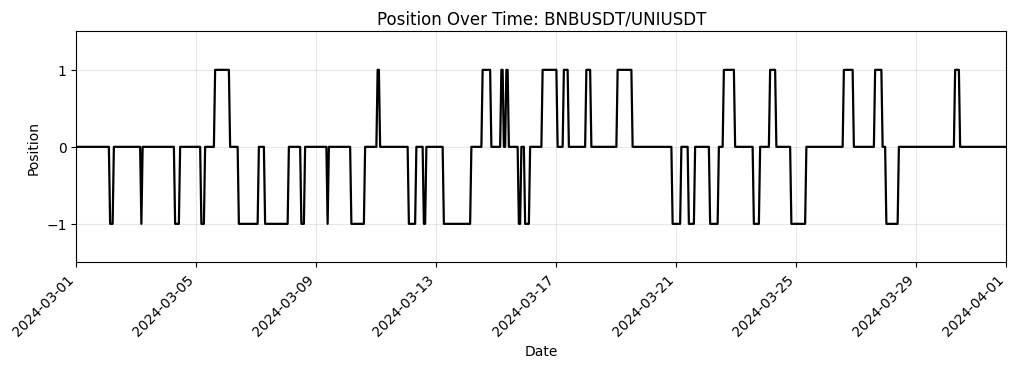

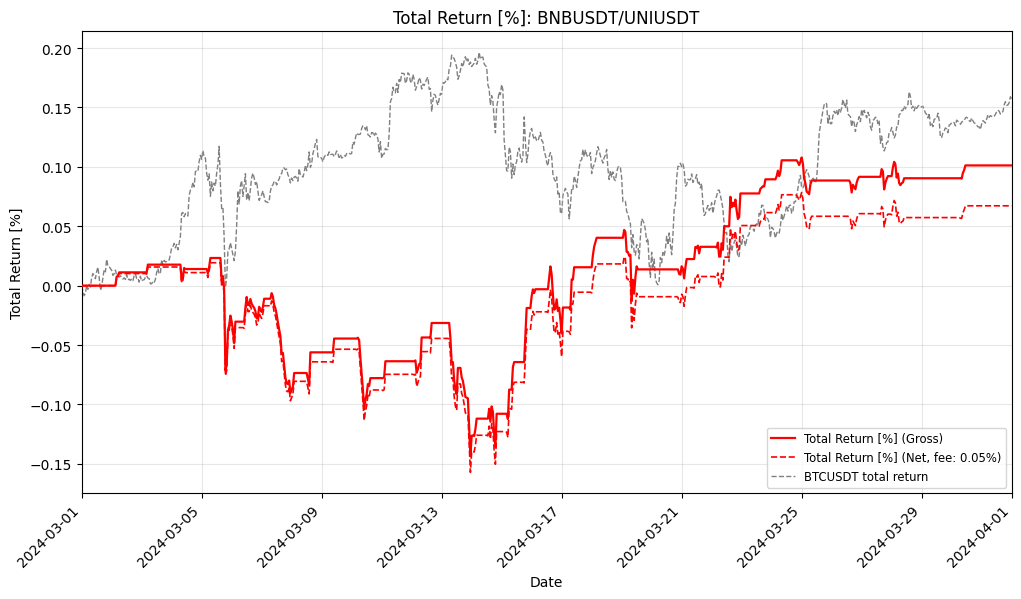

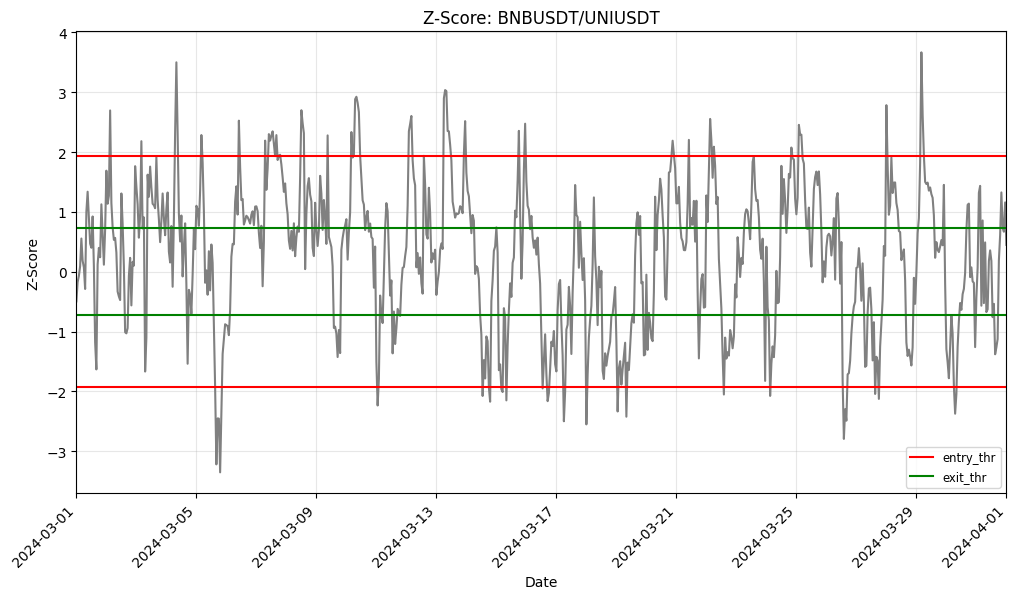

Pair: BTCUSDT/ADAUSDT
                      BTCUSDT  ADAUSDT  z_score    beta  entry_thr  exit_thr  \
open_time                                                                      
2024-03-01 00:00:00  61501.11   0.6718  -0.7210  0.3149     1.9266    0.7276   
2024-03-01 01:00:00  61214.35   0.6727  -0.9670  0.3384     1.9266    0.7276   
2024-03-01 02:00:00  60980.00   0.6763  -1.1209  0.3317     1.9266    0.7276   
2024-03-01 03:00:00  61105.91   0.6727  -0.8553  0.3466     1.9266    0.7276   
2024-03-01 04:00:00  61524.09   0.6743  -0.2343  0.4109     1.9266    0.7276   
...                       ...      ...      ...     ...        ...       ...   
2024-03-31 20:00:00  70840.00   0.6490   1.5186  0.2820     1.9266    0.7276   
2024-03-31 21:00:00  70856.00   0.6461   1.4037  0.2049     1.9266    0.7276   
2024-03-31 22:00:00  70970.00   0.6488   1.5827  0.1052     1.9266    0.7276   
2024-03-31 23:00:00  71280.01   0.6501   2.1709  0.1826     1.9266    0.7276   
2024-04-01 00:00:0

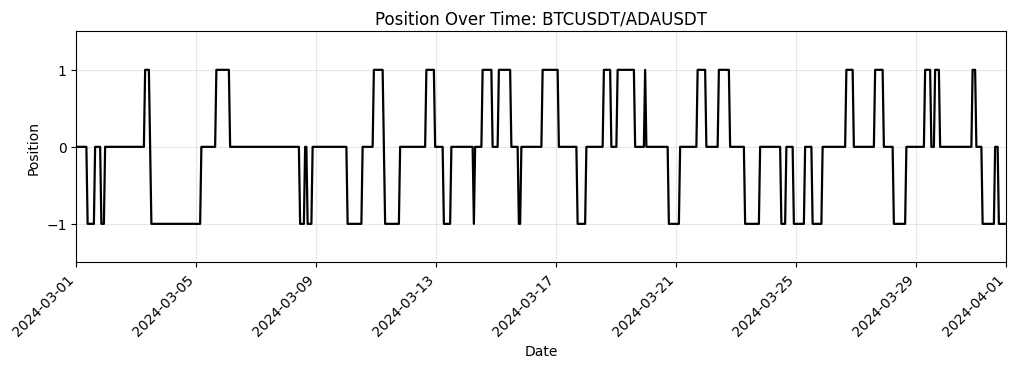

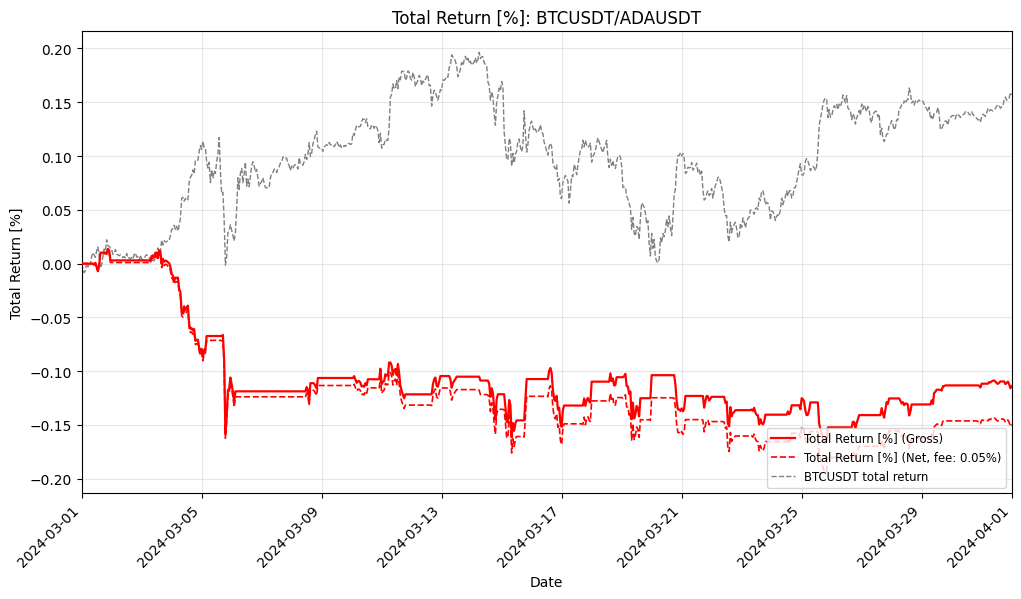

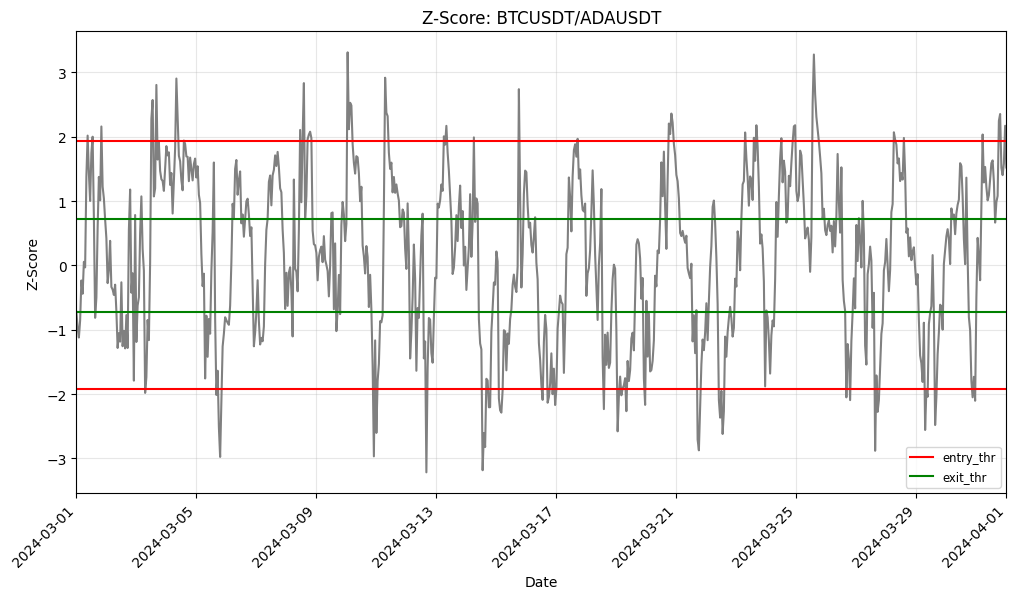

Pair: BTCUSDT/SOLUSDT
                      BTCUSDT  SOLUSDT  z_score    beta  entry_thr  exit_thr  \
open_time                                                                      
2024-03-01 00:00:00  61501.11   132.93  -0.7220  0.1694     1.9266    0.7276   
2024-03-01 01:00:00  61214.35   135.71  -0.9686  0.1862     1.9266    0.7276   
2024-03-01 02:00:00  60980.00   133.85  -1.1220  0.1972     1.9266    0.7276   
2024-03-01 03:00:00  61105.91   133.94  -0.8563  0.1980     1.9266    0.7276   
2024-03-01 04:00:00  61524.09   137.49  -0.2362  0.2084     1.9266    0.7276   
...                       ...      ...      ...     ...        ...       ...   
2024-03-31 20:00:00  70840.00   199.43   1.5175  0.3320     1.9266    0.7276   
2024-03-31 21:00:00  70856.00   199.70   1.4026  0.3235     1.9266    0.7276   
2024-03-31 22:00:00  70970.00   200.62   1.5817  0.3074     1.9266    0.7276   
2024-03-31 23:00:00  71280.01   202.45   2.1701  0.3473     1.9266    0.7276   
2024-04-01 00:00:0

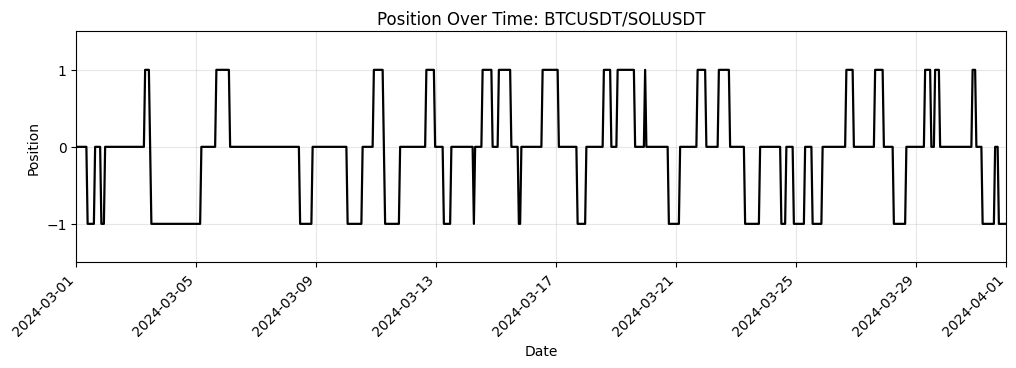

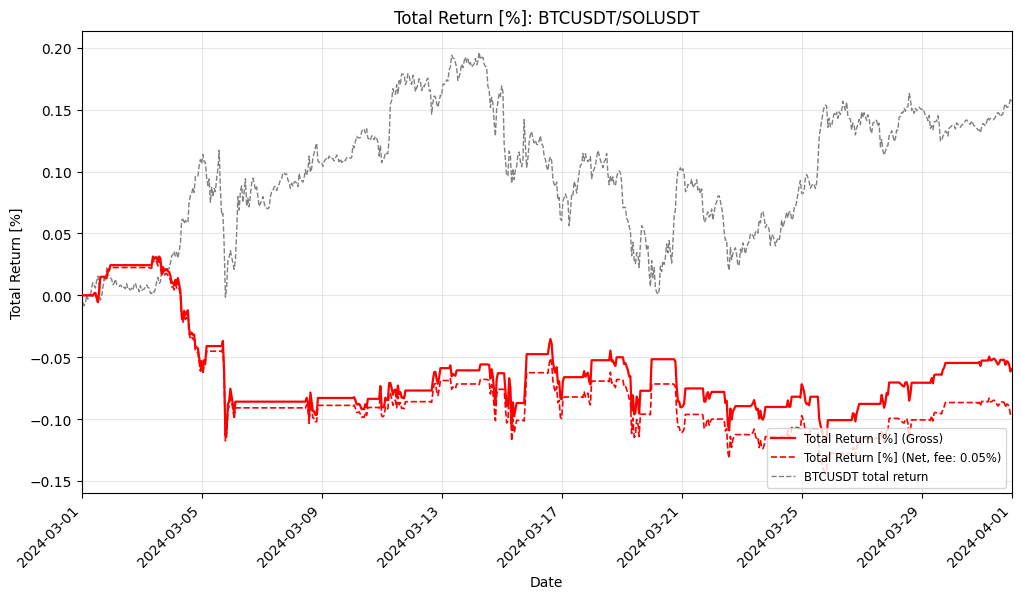

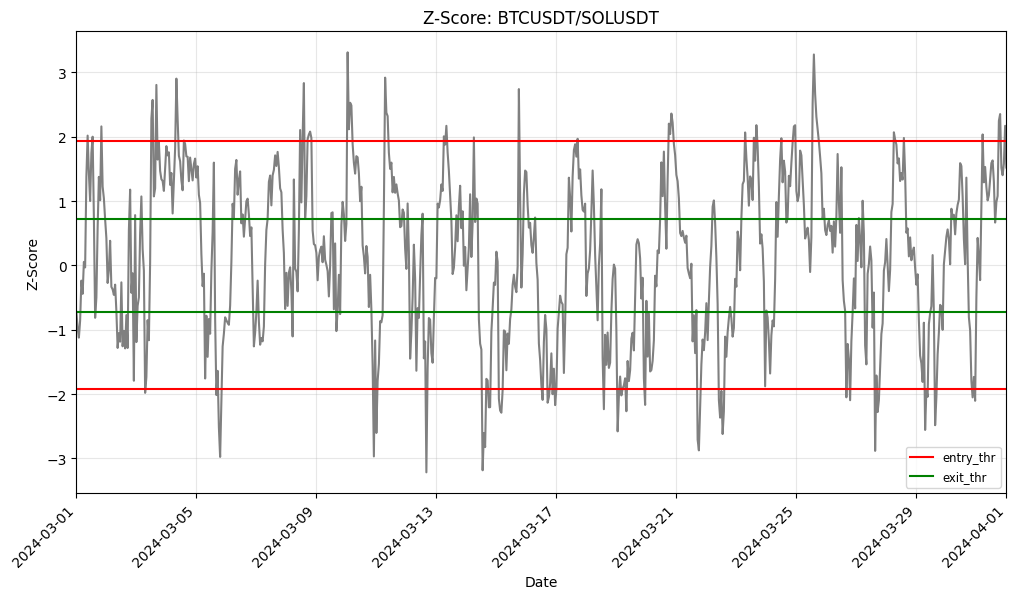

In [7]:
from modules.data_services.data_utils import add_returns
from modules.data_services.data_loaders import load_pair
from skopt.space import Integer, Real
from modules.data_services.data_models import Pair
from modules.performance.strategy import (
    calculate_stats,
    calc_bayesian_params,
    single_pair_strategy
)
from modules.visualization.plots import plot_positions, plot_zscore, plot_pnl

# Perform Bayesian Optimization
param_space = [
        Integer(10, 200, name="rolling_window"),
        Real(1.1, 3.0, name="entry_threshold"),
        Real(0.0, 1.0, name="exit_threshold"),
        Real(1.1, 3.0, name="stop_loss"),
    ]
metric = ("sortino_ratio_annual", "0.05% fee")
minimize = False  # Maximize metric

pairs = []
for ticker in tickers:
    ticker_x = ticker.split('-')[0]
    ticker_y = ticker.split('-')[1]
    print(f"Pair: {ticker_x}/{ticker_y}")

    best_params, best_score = calc_bayesian_params(ticker_x, ticker_y, fee_rate, initial_cash, position_size,
                                                   pre_training_start, training_start, training_end,
                                                   interval, beta_hedge, is_spread, param_space, metric,
                                                   minimize)
    print(best_params)
    print(best_score)

    # === 2. Test ===

    # Load pair and calculate returns
    pair = load_pair(x=ticker_x, y=ticker_y, start=pre_test_start, end=test_end, interval=interval)
    add_returns(pair)

    entry_threshold = best_params["entry_threshold"]
    exit_threshold = best_params["exit_threshold"]
    stop_loss = best_params["stop_loss"]
    rolling_window = best_params["rolling_window"]

    # Run strategy
    pair.test_start = test_start
    pair.fee_rate = fee_rate
    pair.initial_cash = initial_cash

    single_pair_strategy(pair, rolling_window, entry_threshold, exit_threshold, stop_loss, position_size,
                         beta_hedge, is_spread)
    print(pair.data.drop(columns=['total_return', 'total_fees', 'net_return']))

    # Calculate statistics
    pair.stats = calculate_stats(pair)
    print(pair.stats)

    pairs.append(pair)

    # Visualization
    plot_positions(pair, 'multi_pair_strategy', True, True)

    btc_data = load_data(
        tickers=['BTCUSDT'],
        start=test_start,
        end=test_end,
        interval=interval,
    )
    btc_data['BTC_return'] = btc_data['BTCUSDT'].pct_change()
    btc_data.loc[btc_data.index[0], 'BTC_return'] = 0.0
    btc_data['BTC_cum_return'] = (1 + btc_data['BTC_return']).cumprod() - 1

    plot_pnl(pair, btc_data, 'multi_pair_strategy', True, True)
    plot_zscore(pair)

In [8]:
cols_to_sum = ['position', 'total_return', 'total_fees', 'net_return']
summary_data = pairs[0].data[cols_to_sum].copy()
for p in pairs[1:]:
    summary_data += p.data[cols_to_sum]
summary = Pair(data=summary_data, start=pre_test_start, test_start=test_start, end=test_end,
               interval=interval, fee_rate=fee_rate, initial_cash=initial_cash * 5)
summary.data['total_return_pct'] = summary.data['total_return'] / (initial_cash * 5)
summary.data['net_return_pct'] = summary.data['net_return'] / (initial_cash * 5)
summary.data['position'] = summary.data['position'] / 5
summary.stats = calculate_stats(summary)

In [9]:
# Show statistics
summary.stats

,0% fee,0.05% fee
metric,,
total_return,-0.0022,-0.0376
cagr,-0.0258,-0.3624
volatility,0.0047,0.0048
volatility_annual,0.4438,0.4483
max_drawdown,-0.1124,-0.1146
win_count,38.0000,38.0000
lose_count,17.0000,17.0000
win_rate,0.6909,0.6909
max_win,0.0364,0.0360


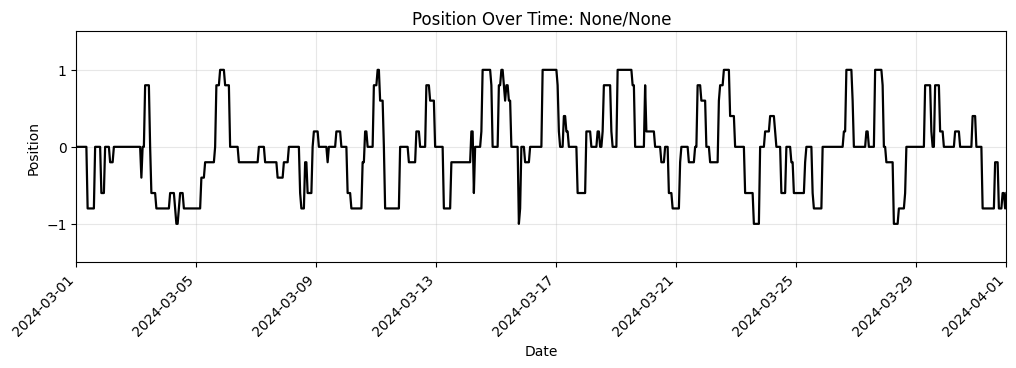

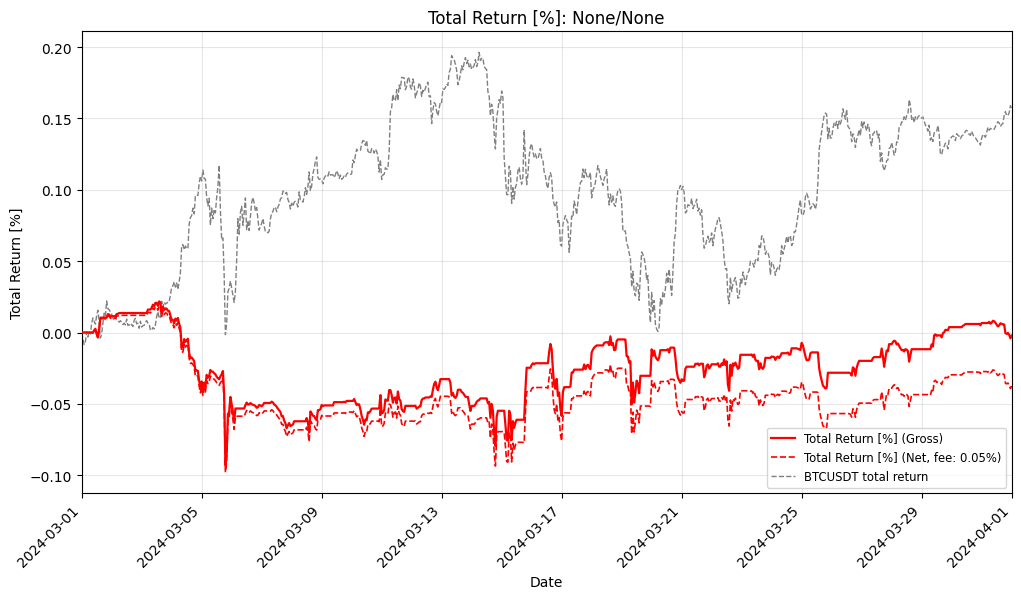

In [10]:
# Visualization
from modules.visualization.plots import plot_pnl

plot_positions(summary, 'multi_pair_strategy', True, True)

btc_data = load_data(
    tickers=['BTCUSDT'],
    start=test_start,
    end=test_end,
    interval=interval,
)
btc_data['BTC_return'] = btc_data['BTCUSDT'].pct_change()
btc_data.loc[btc_data.index[0], 'BTC_return'] = 0.0
btc_data['BTC_cum_return'] = (1 + btc_data['BTC_return']).cumprod() - 1

plot_pnl(summary, btc_data, 'multi_pair_strategy', False, True)